In [2]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import os

In [3]:
model = tf.keras.models.load_model("fruit_model.h5")

# Load labels from labels.txt
with open("labels.txt", "r") as f:
    class_names = [line.strip() for line in f.readlines()]

print("Loaded Classes:", class_names)

def predict_fruit(img_path):
    IMG_SIZE = (224, 224)

    # Load & preprocess image
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Prediction
    pred = model.predict(img_array)
    class_index = np.argmax(pred)
    fruit_name = class_names[class_index]
    confidence = pred[0][class_index]

    # Display result
    plt.imshow(img)
    plt.title(f"{fruit_name} ({confidence*100:.2f}% confidence)")
    plt.axis("off")
    plt.show()

    print(f"\nPrediction: {fruit_name}")
    print(f"Confidence: {confidence*100:.2f}%")

    return fruit_name, confidence

Loaded Classes: ['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 874ms/step


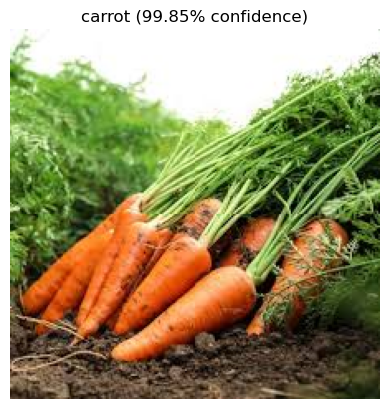


Prediction: carrot
Confidence: 99.85%


('carrot', np.float32(0.99853444))

In [4]:
image_path = "image.png"# Path to the image to be predicted
predict_fruit(image_path)